In [16]:
# Importando libs

import numpy as np
import cv2
from tensorflow.keras.models import load_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical



In [8]:
# Carregando o dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


y_train_4:  9


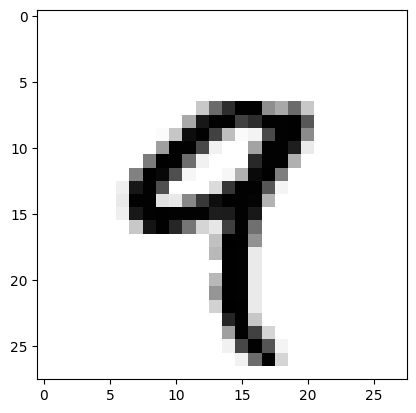

In [15]:
# Mostrando as imagens dentro do notebook
%matplotlib inline
plt.imshow(x_train[4], cmap='gray_r')
print("y_train_4: ",y_train[4])


In [19]:
# Transformando labels em one-hot encoding
y_train_category = to_categorical(y_train)
y_test_category = to_categorical(y_test)

## Checando o encoding
print(y_train_category[1])
print(y_test_category[1])



[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# Normalizando os dados de treino e teste
x_train_normalized = x_train/x_train.max()
x_test_normalized = x_test/x_test.max()

In [21]:
# Dando um reshape em todos os inputs para o modelo
x_train = x_train.reshape(len(x_train), 28,28,1)
x_train_normalized = x_train_normalized.reshape(len(x_train_normalized), 28,28,1)
x_test = x_test.reshape(len(x_test), 28,28,1)
x_test_normalized = x_test_normalized.reshape(len(x_test_normalized), 28,28,1)



In [22]:
# Importação das bibliotecas necessárias para treinar a rede
#Modelo da rede
from keras.models import Sequential
#Camadas que serão utilizadas
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [23]:
# Criando um modelo de rede neural convolucional
model = Sequential()
# Primeira camada da rede neural
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
# O maxpool faz o sub-sampling da amostra do kernel.
model.add(MaxPool2D(strides=2))
# Outra camada de convolução
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
# Transforma as sáidas da camada anterior em um único vetor
model.add(Flatten())
# MLP com tamanhos específicos
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
# Criando o modelo
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [28]:
# Compilando o modelo
from keras.optimizers import Adam
adam = Adam()
# Entropia cruzada é feita pra aumentar a distância máxima entre as classes
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)


In [29]:
# Treinando o modelo
trained_model = model.fit(x_train_normalized, y_train_category, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 92s 59ms/step - loss: 0.1393 - accuracy: 0.9563 - val_loss: 0.0724 - val_accuracy: 0.9753
Epoch 2/10
1500/1500 [==============================] - 86s 57ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 3/10
1500/1500 [==============================] - 88s 59ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 4/10
1500/1500 [==============================] - 86s 58ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0498 - val_accuracy: 0.9864
Epoch 5/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0406 - val_accuracy: 0.9897
Epoch 6/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 7/10
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0323 -

Text(0, 0.5, 'perda')

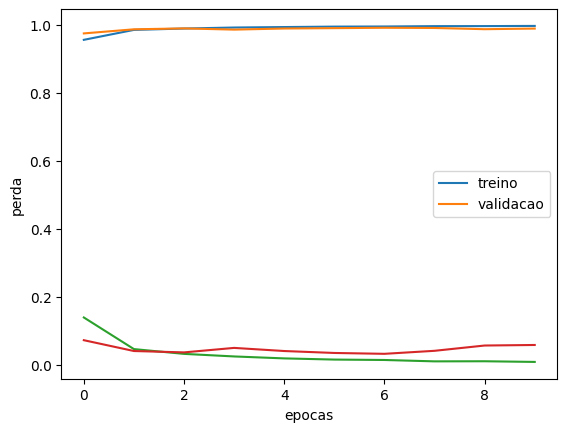

In [30]:
# Métricas do modelo
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

# Perda
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')


In [33]:
# Salvando o modelo
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
# Testando o modelo
from tensorflow.keras.models import load_model
modelo_2 = load_model('mnist_model.h5')

# Realiza uma predição com o modelo
predicao = model.predict(x_test_normalized[0].reshape(1, 28, 28, 1))
print(np.argmax(predicao))


1/1 [==============================] - 0s 36ms/step
7


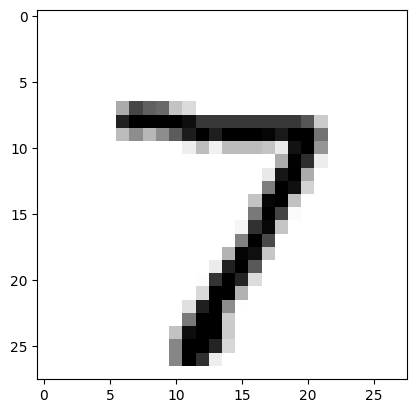

In [36]:
plt.imshow(x_test_normalized[0], cmap='gray_r')
